# get marker gene expression value

In [1]:
# get list of all marker genes

# list of marker genes exist / not exist in my dataset

# get expression prot cells (diffrenet decoding versions)

# calculate mean expression value in train dataset

# mean center prot cells

# plot

## load all marker genes

In [9]:
import pandas as pd
marker_genes = pd.read_excel('./data/immune-marker-genes.xlsx', index_col=0)

## load data

In [46]:
from interpretable_ssl.trainers.scpoli_trainer import *
from interpretable_ssl.datasets.immune import *
ds = ImmuneDataset()
st = ScpoliProtBarlowTrainer(ds)
train_adata = st.ref.adata
# scpoli-wsampling-100epoch-num-prot-64_hidden-64_bs-64.pth
st.num_prototypes = 64
st.experiment_name = 'scpoli-wsampling-100epoch'
st.get_model_name()


loading data


/ictstr01/home/icb/fatemehs.hashemig/codes/interpretable-ssl/interpretable_ssl/datasets/dataset.py:43: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.adata.obs['encoded_cell_type'] = self.le.transform(self.adata.obs.cell_type)
/ictstr01/home/icb/fatemehs.hashemig/codes/interpretable-ssl/interpretable_ssl/datasets/dataset.py:43: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.adata.obs['encoded_cell_type'] = self.le.transform(self.adata.obs.cell_type)


'scpoli-wsampling-100epoch-num-prot-64_hidden-64_bs-64.pth'

In [3]:
cell_types = train_adata.obs.cell_type.cat.categories
cell_types

Index(['CD4+ T cells', 'CD8+ T cells', 'CD10+ B cells', 'CD14+ Monocytes',
       'CD16+ Monocytes', 'CD20+ B cells', 'Erythrocytes',
       'Erythroid progenitors', 'HSPCs', 'Megakaryocyte progenitors',
       'Monocyte progenitors', 'Monocyte-derived dendritic cells', 'NK cells',
       'NKT cells', 'Plasma cells', 'Plasmacytoid dendritic cells'],
      dtype='object')

## get prot cells

In [48]:
model = st.load_model()
# prot_cells_closest = model.decode_prototypes_using_closest_cell(train_adata)
prot_cells_batch = model.decode_prototypes_using_all_batch()

Embedding dictionary:
 	Num conditions: [3]
 	Embedding dim: [10]
Encoder Architecture:
	Input Layer in, out and cond: 4000 64 10
	Mean/Var Layer in/out: 64 8
Decoder Architecture:
	First Layer in, out and cond:  8 64 10
	Output Layer in/out:  64 4000 



## calculate mean expression value of all genes

In [5]:
mean = train_adata.X.mean(0)

# get marker_gene idx

In [50]:
marker_gene_cnt = 3
marker_genes[:marker_gene_cnt]

,CD4+ T cells,CD8+ T cells,CD10+ B cells,CD14+ Monocytes,CD16+ Monocytes,CD20+ B cells,Erythrocytes,Erythroid progenitors,HSPCs,Megakaryocyte progenitors,Monocyte progenitors,Monocyte-derived dendritic cells,NK cells,NKT cells,Plasma cells,Plasmacytoid dendritic cells
0,PIK3IP1,RPS4X,STMN1,S100A9,LST1,CD79B,HBA1,TUBA1B,RPLP0,GAPDH,GAPDH,CST3,NKG7,NKG7,MZB1,ITM2C
1,IFITM1,RPLP0,CD79B,S100A8,AIF1,HLA-DPA1,MPP1,HBA1,RPS4X,STMN1,HBA1,HLA-DPA1,GNLY,CST7,SEC11C,TCF4
2,SUSD3,IFITM1,HBA1,LYZ,CST3,HLA-DRB1,SNX3,REXO2,HBA1,TXN,TXN,HLA-DRB1,CST7,HOPX,ITM2C,IRF7


In [51]:
column_values = {col: marker_genes[col][:marker_gene_cnt].tolist() for col in marker_genes.columns}
marker_gene_list = [value for sublist in column_values.values() for value in sublist]
marker_gene_list = list(set(marker_gene_list))

In [52]:
marker_gene_idx = [list(gene_list).index(gene) for gene in marker_gene_list]

In [53]:
len(marker_gene_idx)

31

In [54]:
gene_list = train_adata.var_names.tolist()

In [56]:
from interpretable_ssl.evaluation.marker_genes import *

index = [f'prot {i}' for i in range(64)]
# df1 = get_marker_genes_expression(prot_cells_closest, marker_gene_idx, marker_gene_list, index)
df2 = get_marker_genes_expression(prot_cells_batch, marker_gene_idx, marker_gene_list, index)

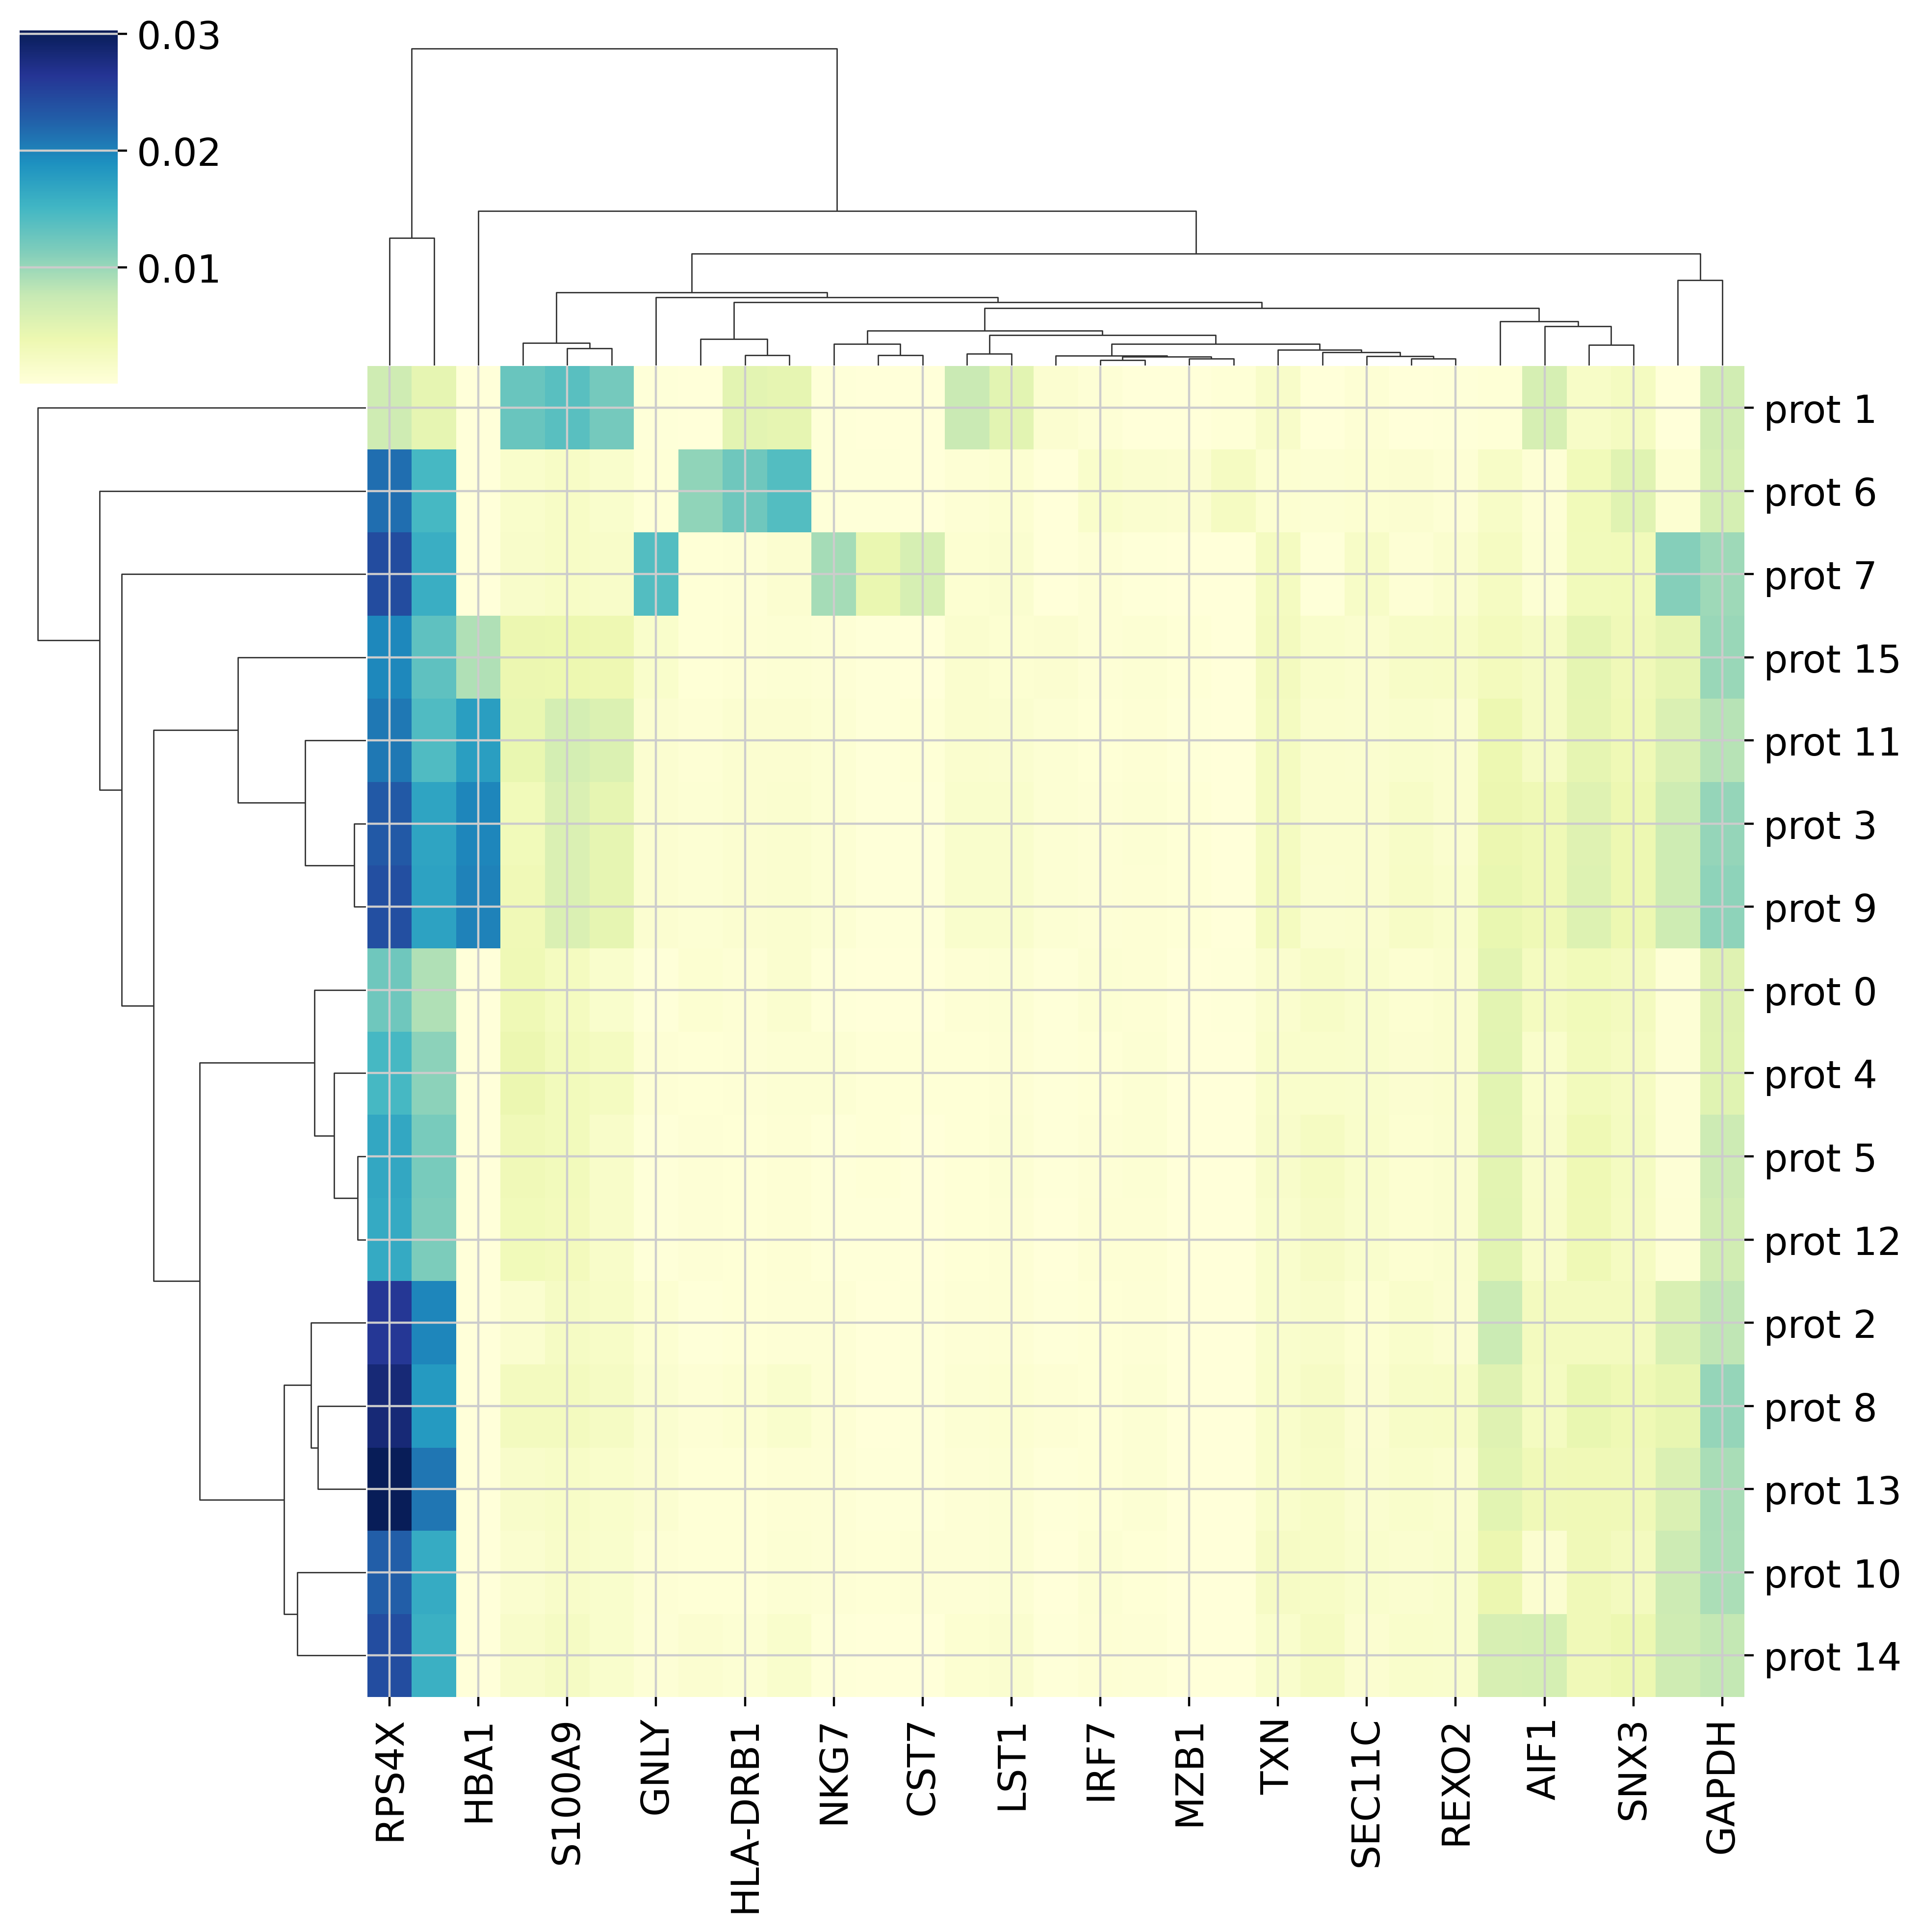

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create the clustered heatmap using seaborn clustermap
sns.clustermap(df1, cmap="YlGnBu")

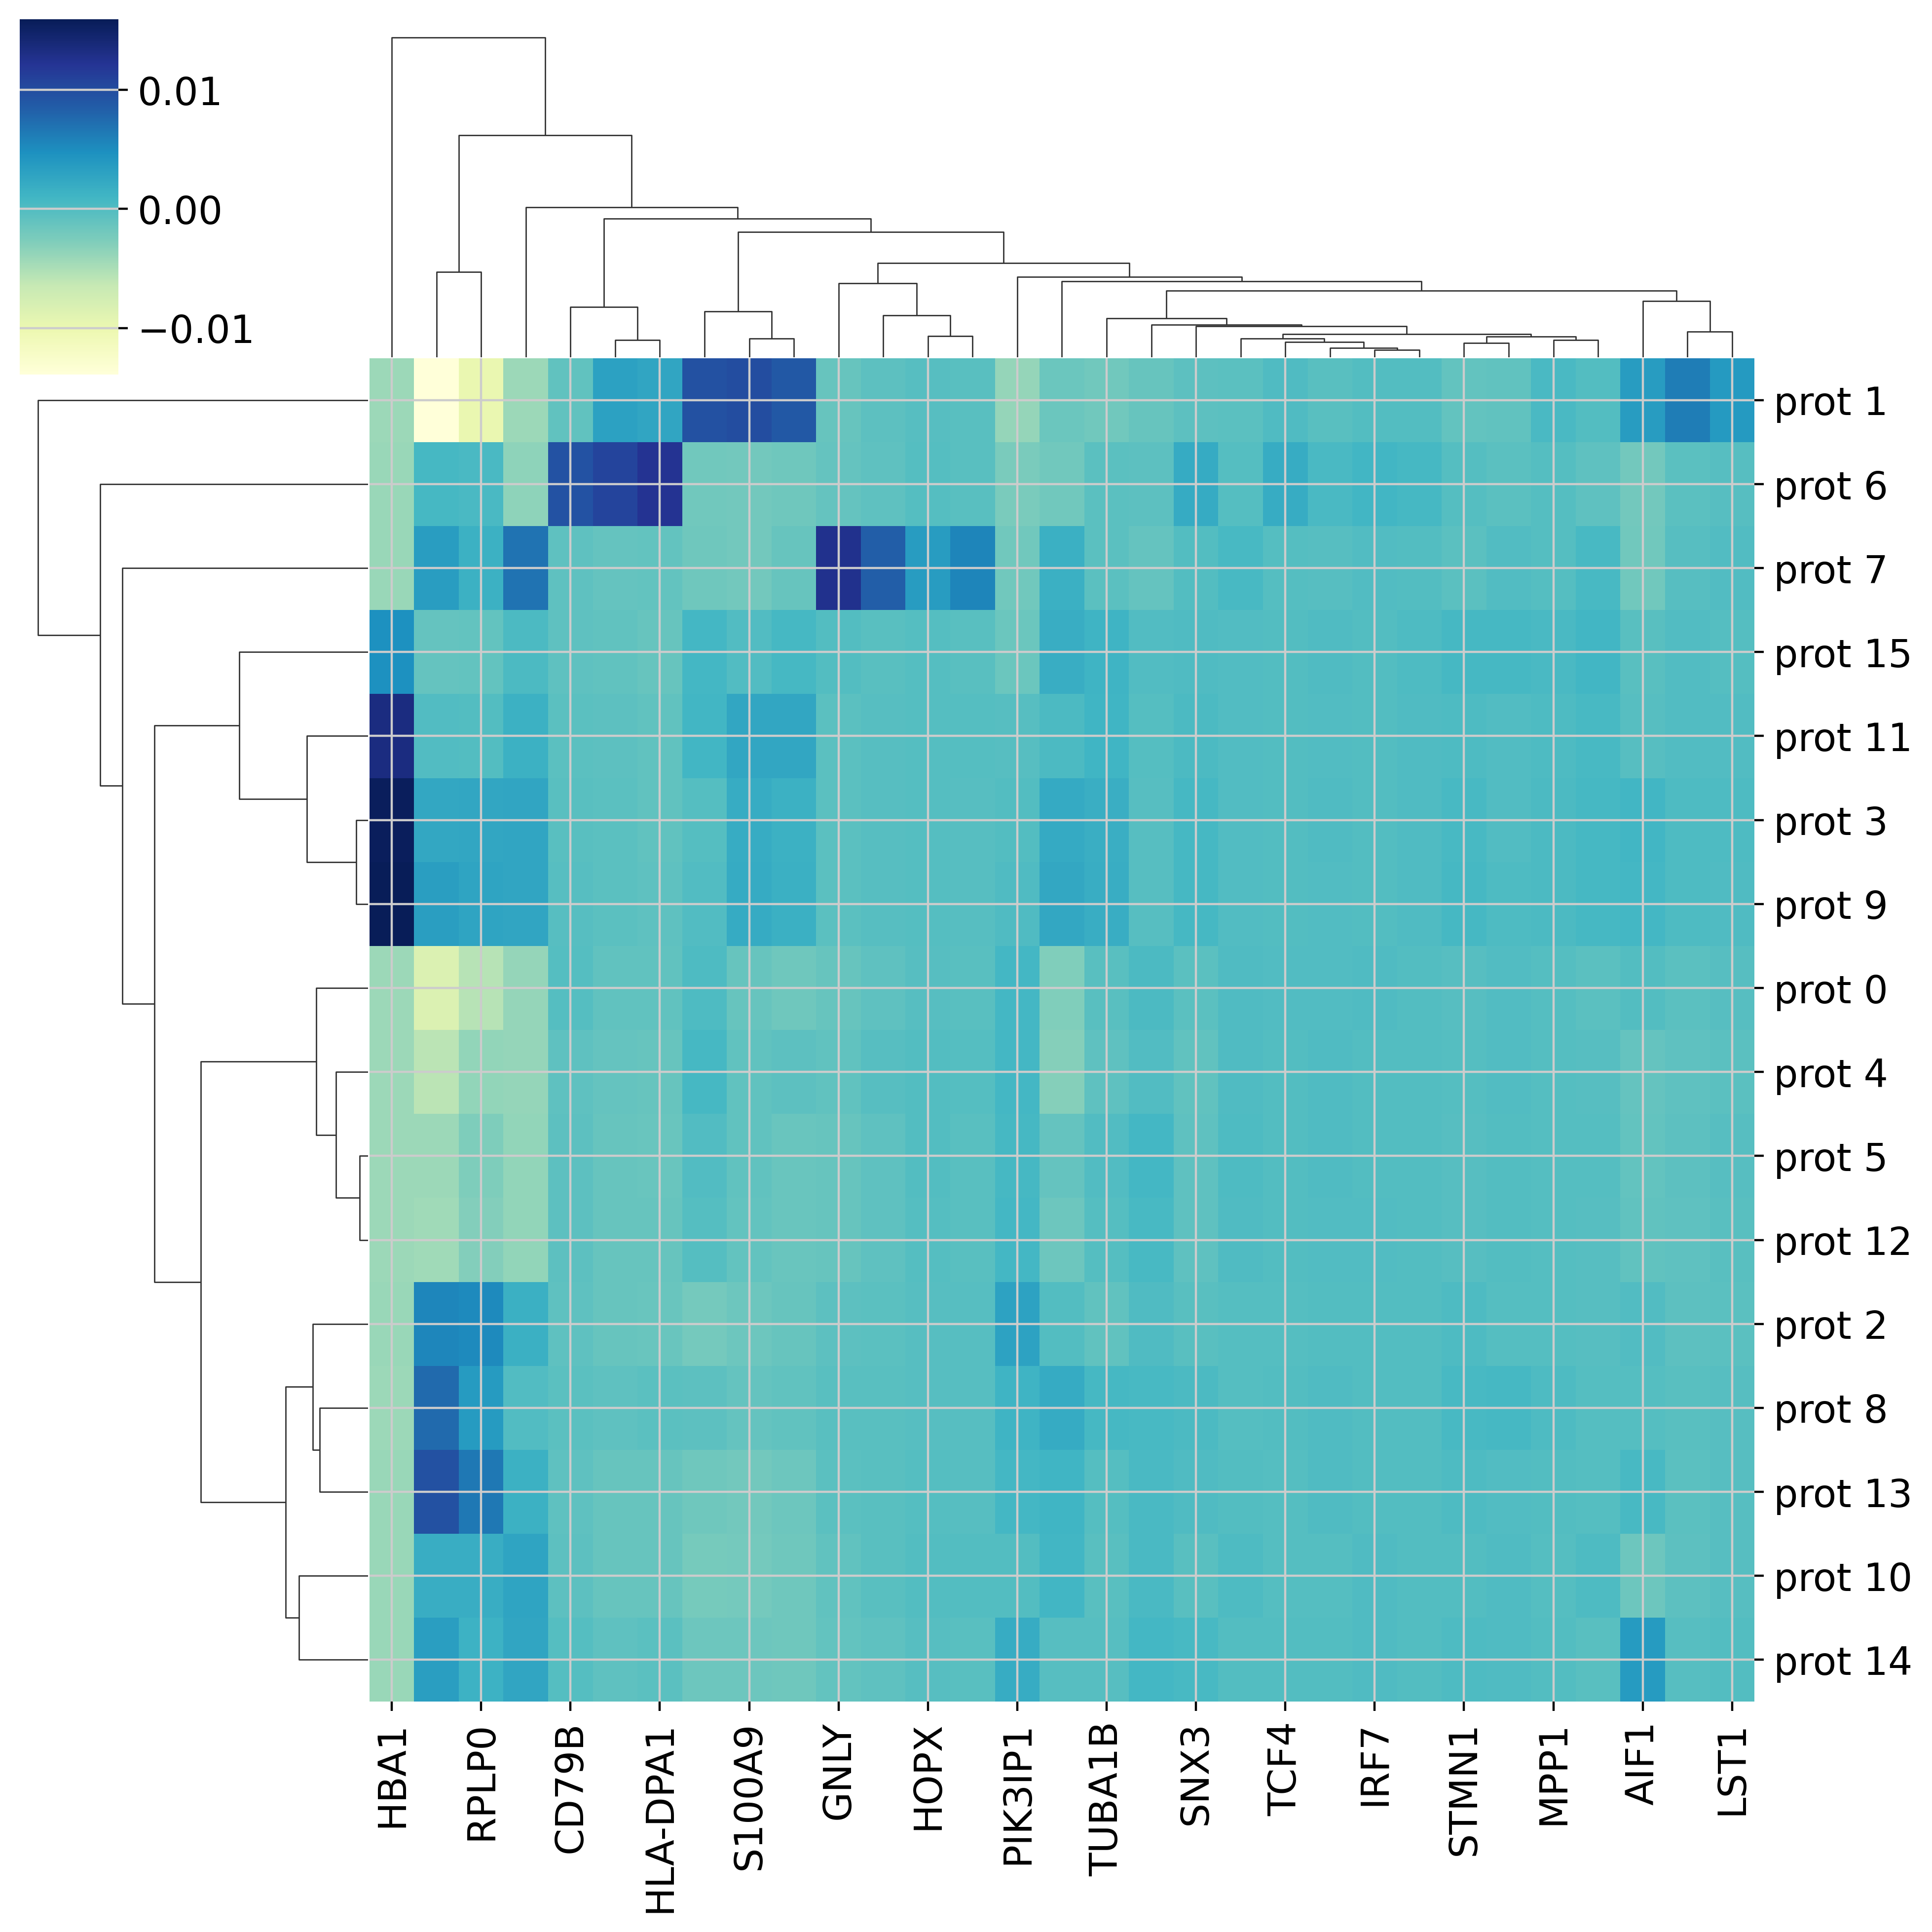

In [43]:
sns.clustermap(df1 - df1.mean(0), cmap="YlGnBu")

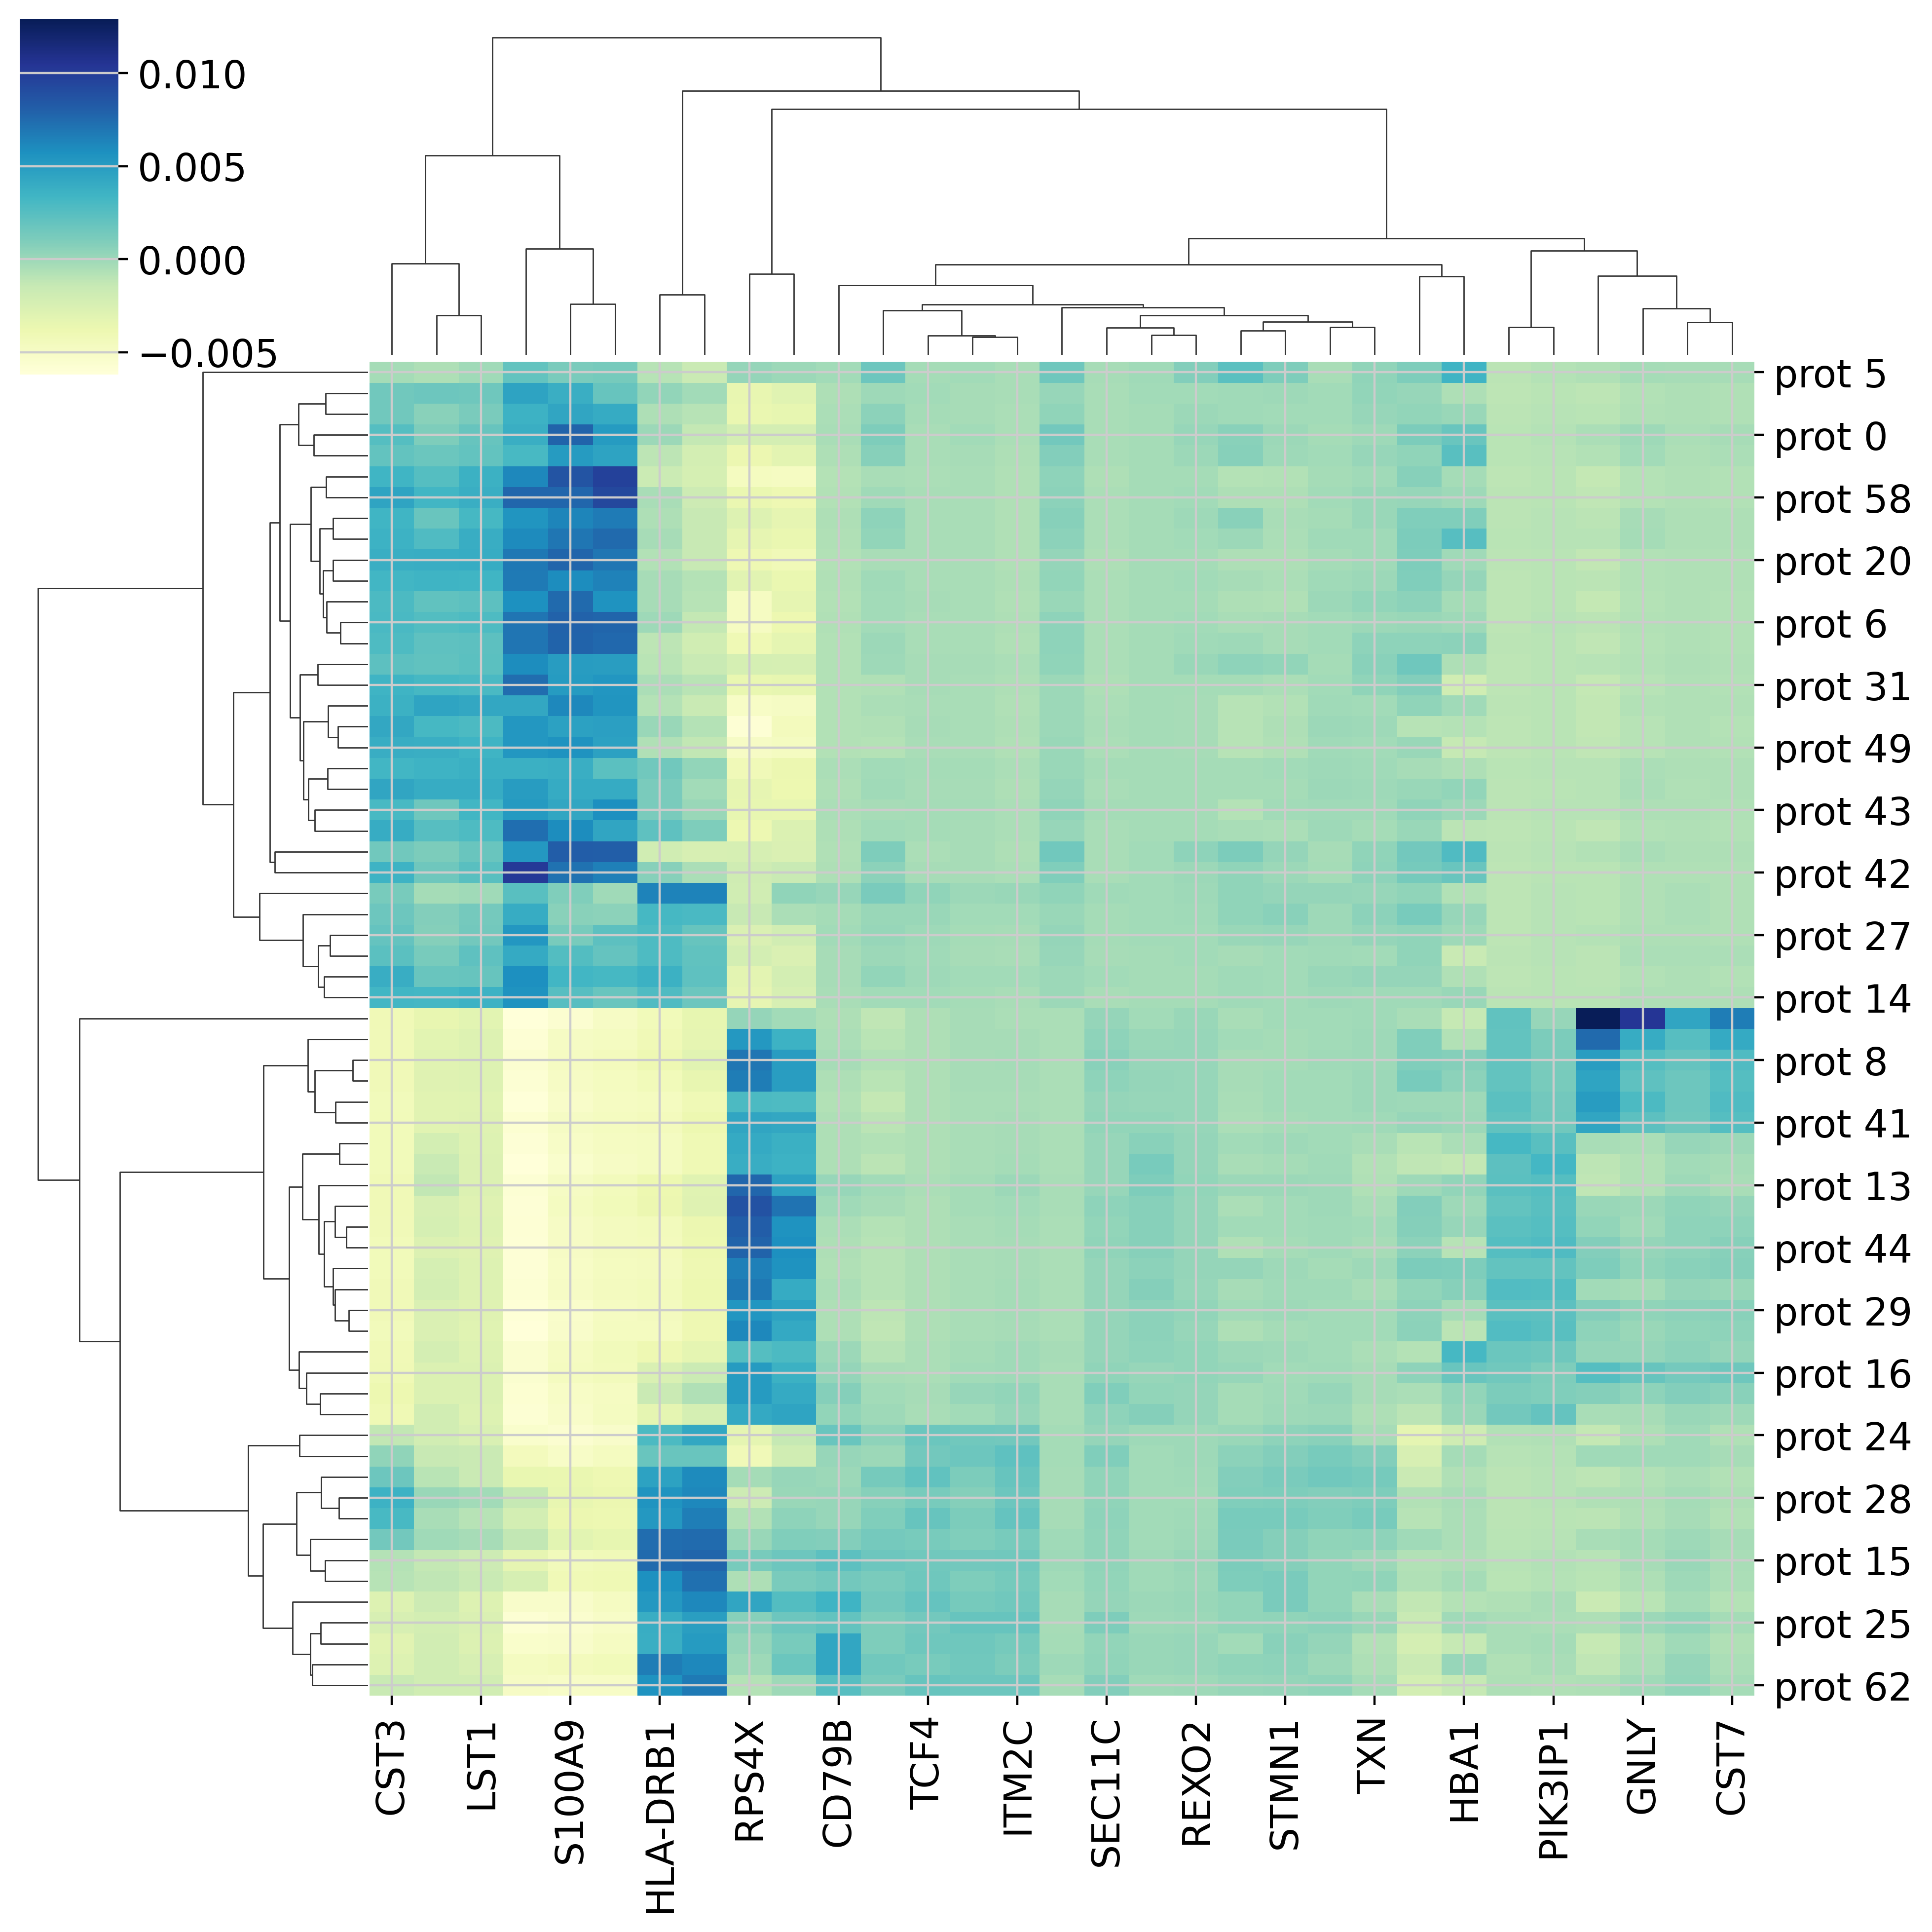

In [59]:
sns.clustermap(df2-df2.mean(0), cmap="YlGnBu")

In [61]:
len(df2.columns)

31

<Figure size 2400x1600 with 0 Axes>

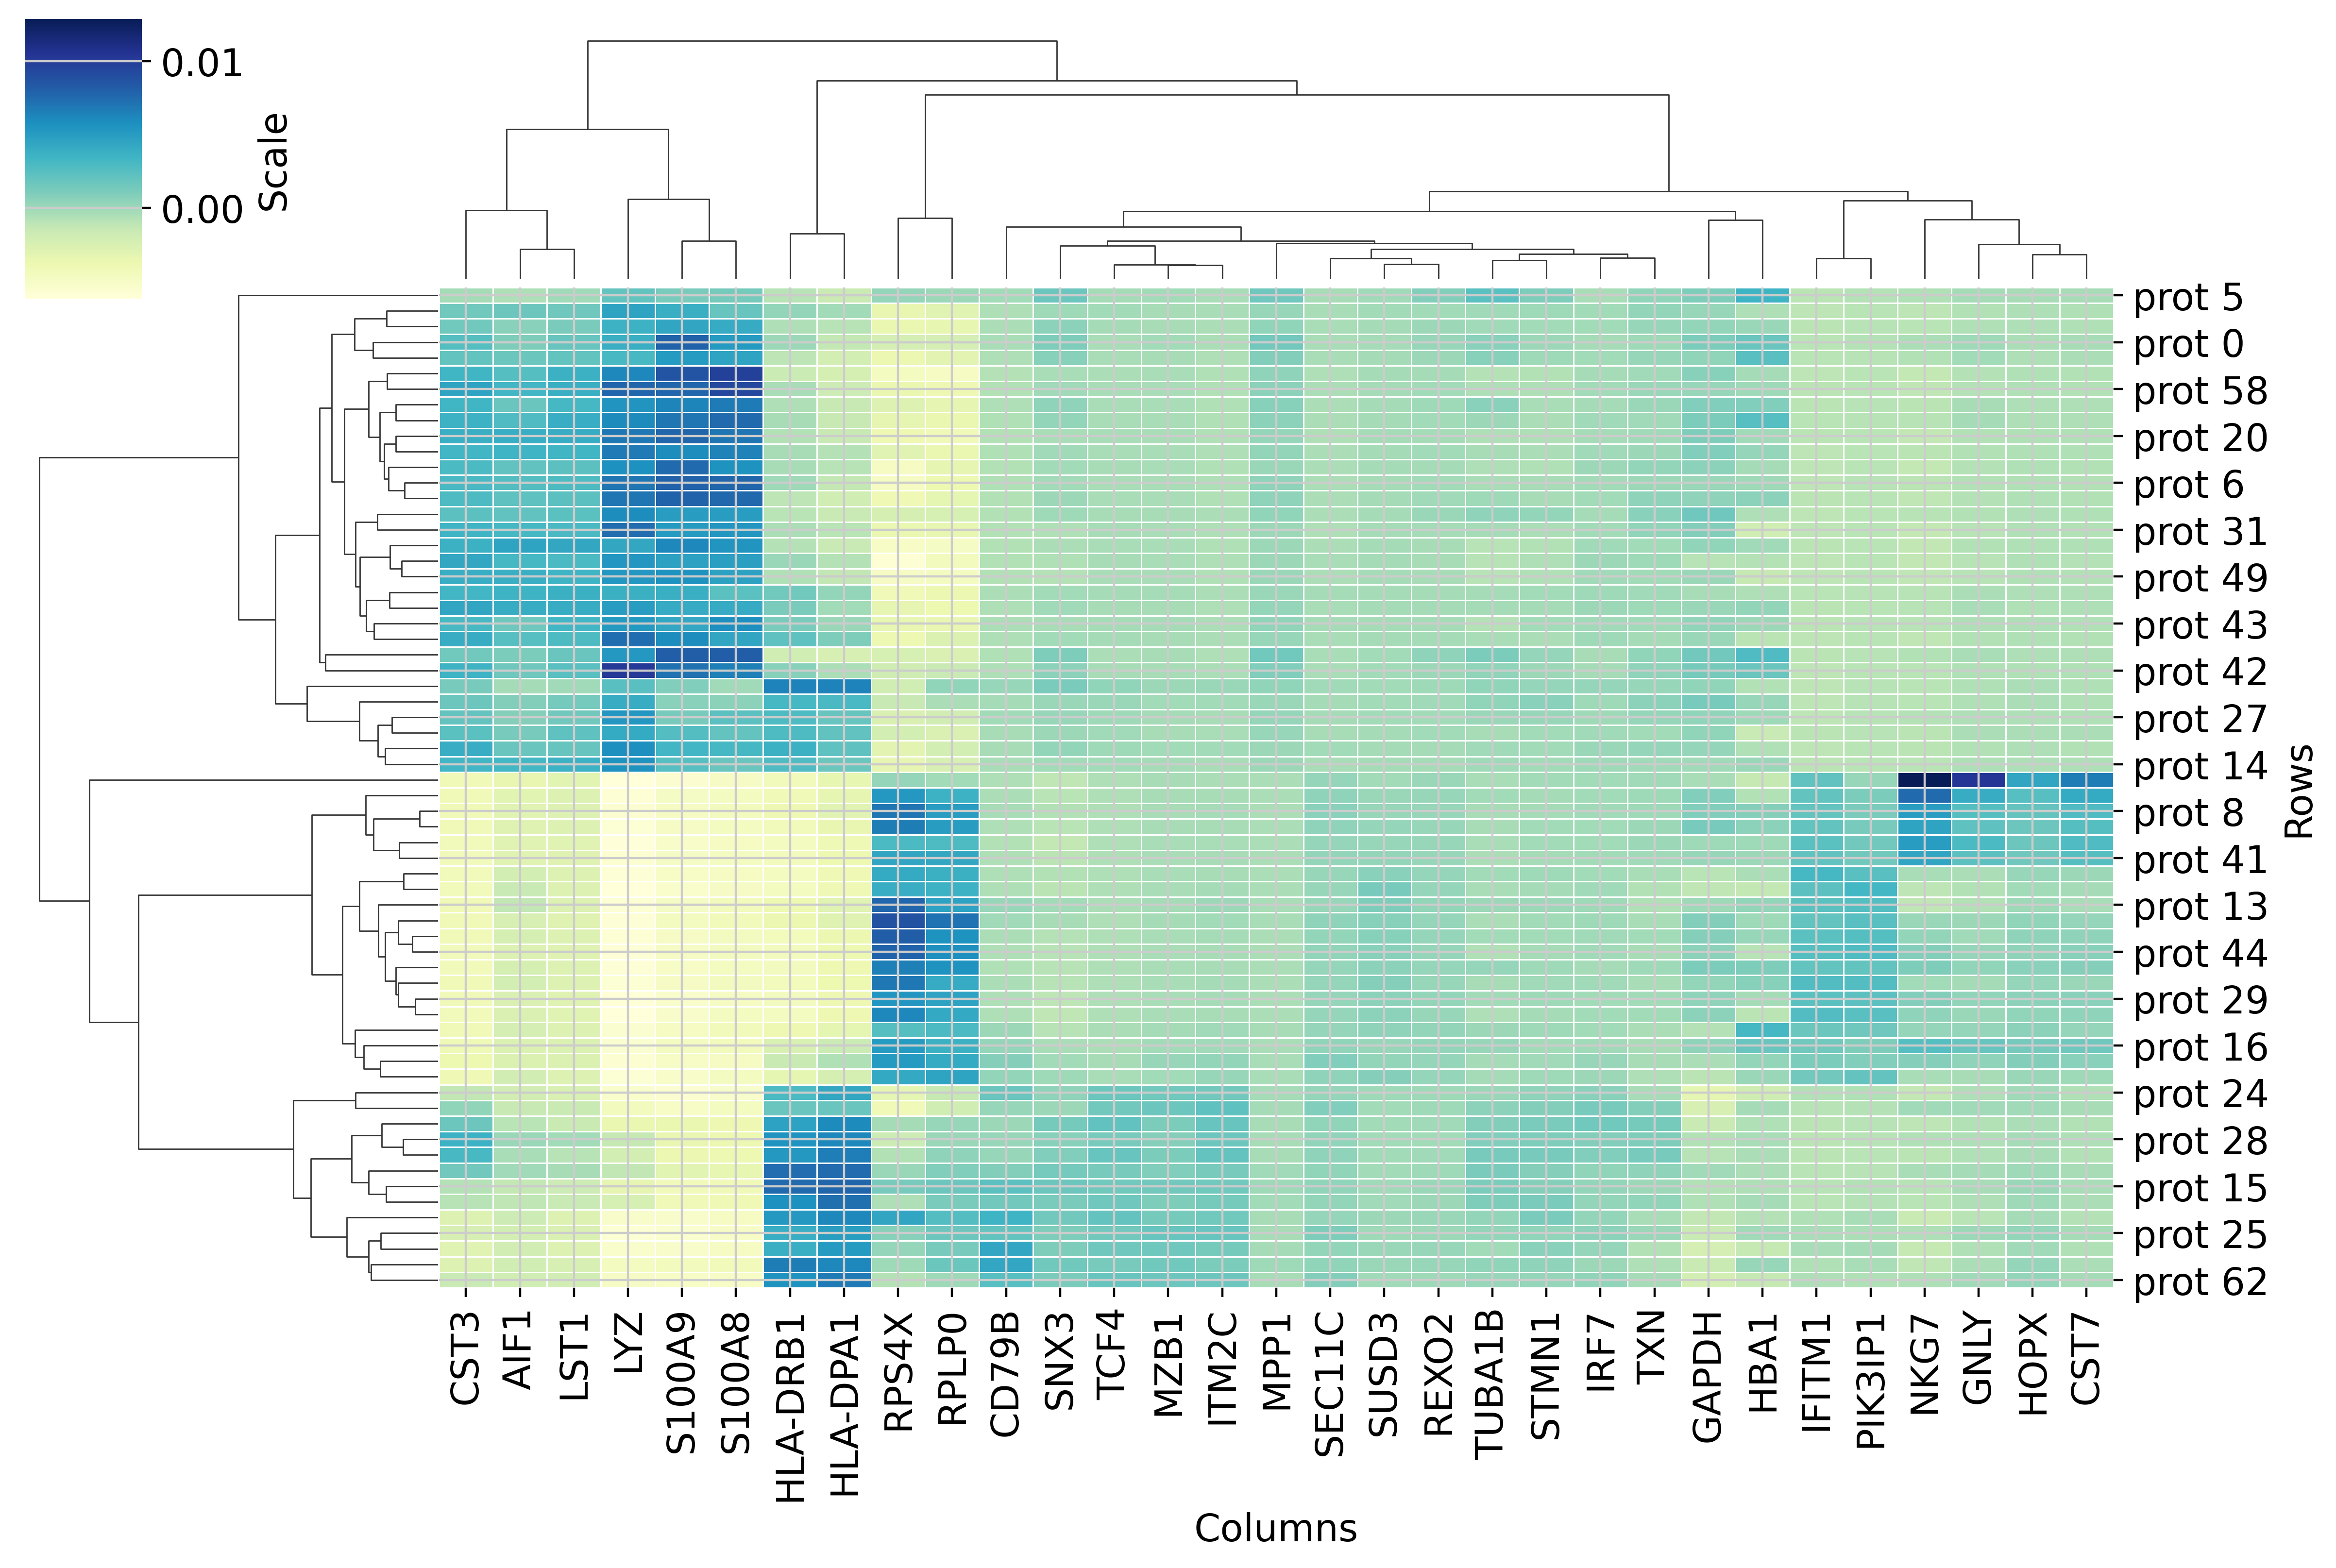

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_clustermap(df, figsize=(12, 8), cmap='YlGnBu'):
    """
    Plots a clustermap of the given DataFrame with labels.

    Parameters:
    df (pd.DataFrame): DataFrame to plot
    figsize (tuple): Size of the figure
    cmap (str): Colormap to use
    """
    plt.figure(figsize=figsize)
    g = sns.clustermap(df, cmap=cmap, linewidths=.5, figsize=figsize, cbar_kws={'label': 'Scale'})
    plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)  # Rotate column labels if needed
    plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)   # Rotate row labels if needed
    g.ax_heatmap.set_xlabel('Columns')
    g.ax_heatmap.set_ylabel('Rows')
    plt.show()

# Example usage
# Create a sample DataFrame
data = np.random.rand(64, 31)
columns = [f'Col{i}' for i in range(1, 32)]
index = [f'Row{i}' for i in range(1, 65)]
df = pd.DataFrame(data, columns=columns, index=index)

# Plot the clustermap
plot_clustermap(df2-df2.mean(0))
